<a href="https://colab.research.google.com/github/pedrohbp00/DengAI/blob/main/dengAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Projeto Prático de Ciência da Computação**


 > Objetivo: desenvolver um modelo de machine learning capaz de prever os casos de dengue nas cidades de San Juan e Iquitos, localizadas em Porto Rico e Peru, respectivamente.


### **Dataset/Fonte dos Dados**

> Dataset: https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/data/

> Fonte dos dados: os dados foram coletados por agências governamentais dos EUA e estão disponíveis no seguinte link: http://www.cdc.gov/ 

In [ ]:
## Importando as bibliotecas para análise e processamento dos dados
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
## Setando o estilo dos gráficos
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [8, 6]

### **Carregando o Dataset**

In [ ]:
## Carregando o Dataframe com os dados do Dataset
df_features_train = pd.read_csv('https://raw.githubusercontent.com/pedrohbp00/DengAI/main/dengue_features_train.csv')
df_features_test = pd.read_csv('https://raw.githubusercontent.com/pedrohbp00/DengAI/main/dengue_features_test.csv')
df_labels_train = pd.read_csv('https://raw.githubusercontent.com/pedrohbp00/DengAI/main/dengue_labels_train.csv')

print('Shape - Features de Treino:', df_features_train.shape)
print('Shape - Features de Teste:', df_features_train.shape)
print('Shape - Labels de Treino:', df_labels_train.shape)

df_features_train.head()

Shape - Features de Treino: (1456, 24)
Shape - Features de Teste: (1456, 24)
Shape - Labels de Treino: (1456, 4)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [ ]:
df_labels_train.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


### **Ano com mais casos de Dengue: 1994**

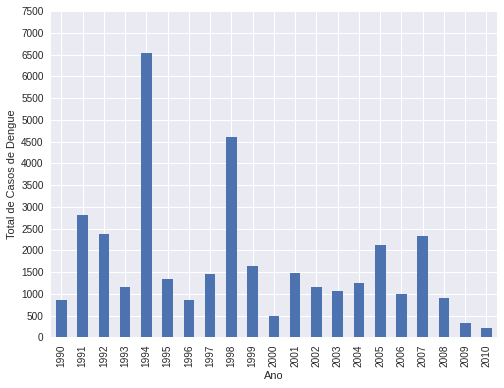

In [ ]:
ano_max_casos = df_labels_train.groupby(['year'])['total_cases'].sum()

#Plotagem do gráfico
ano_max_casos.plot(kind='bar')
plt.yticks(np.arange(0,8000, step=500))
plt.ylabel('Total de Casos de Dengue')
plt.xlabel('Ano')
plt.show()

### **Cidade com mais casos de Dengue: San Juan (sj)**

[]

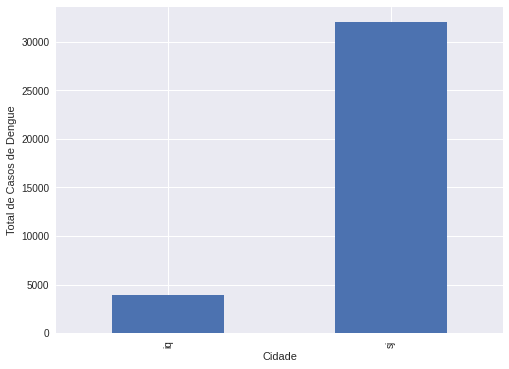

In [ ]:
cidade_top_casos = df_labels_train.groupby(['city'])['total_cases'].sum()

#Plotagem do gráfico
cidade_top_casos.plot(kind='bar')
plt.xlabel('Cidade')
plt.ylabel('Total de Casos de Dengue')
plt.plot()

### **Processamento dos Dados**

In [ ]:
## Verificando se há valores nulos
df_features_train.info()
df_features_train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [ ]:
## Capturando as variáveis(features) que têm valores nulos
missing = list(df_features_train.columns[df_features_train.isna().sum() > 0])

## Preenchendo os valores nulos com a média
for feature in missing:
  df_features_train[feature] = df_features_train[feature].fillna(df_features_train[feature].mean())
  
df_features_train.isna().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre